In [58]:
import sys
sys.path.append("../../deep-learning-from-scratch-2")
import numpy as np
import matplotlib.pyplot as plt
from common.optimizer import SGD
from dataset import spiral
from common.layers import Affine, Sigmoid, SoftmaxWithLoss
# from ch01.two_layer_net import TwoLayerNet

In [59]:
# 推論、学習モデルの実装
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        lr = 0.01 # learning rate
        W1 = lr * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = lr * np.random.randn(H, O)
        b2 = np.zeros(O)
#         W2 = lr * np.random.randn(H, H)
#         b2 = np.zeros(H)
#         W3 = lr * np.random.randn(H, O)
#         b3 = np.zeros(O)
        
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2),
#             Sigmoid(),
#             Affine(W3, b3)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout = 1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [60]:
# 学習コード実装
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

data_size = len(x)
max_iters = data_size // batch_size # 10
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters * batch_size:(iters+1)*batch_size]
        batch_t = t[iters * batch_size:(iters+1)*batch_size]
    
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        if(iters+1)%10 == 0:
            avg_loss = total_loss/loss_count
            print('| epoch %d | iter %d / %d | loss %.2f' % (epoch + 1, iters + 1, max_iters, loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 | iter 10 / 10 | loss 1.19
| epoch 2 | iter 10 / 10 | loss 1.17
| epoch 3 | iter 10 / 10 | loss 1.10
| epoch 4 | iter 10 / 10 | loss 1.04
| epoch 5 | iter 10 / 10 | loss 1.03
| epoch 6 | iter 10 / 10 | loss 1.13
| epoch 7 | iter 10 / 10 | loss 1.09
| epoch 8 | iter 10 / 10 | loss 1.12
| epoch 9 | iter 10 / 10 | loss 1.31
| epoch 10 | iter 10 / 10 | loss 1.14
| epoch 11 | iter 10 / 10 | loss 1.11
| epoch 12 | iter 10 / 10 | loss 1.13
| epoch 13 | iter 10 / 10 | loss 1.07
| epoch 14 | iter 10 / 10 | loss 1.05
| epoch 15 | iter 10 / 10 | loss 1.03
| epoch 16 | iter 10 / 10 | loss 0.96
| epoch 17 | iter 10 / 10 | loss 0.91
| epoch 18 | iter 10 / 10 | loss 0.86
| epoch 19 | iter 10 / 10 | loss 0.84
| epoch 20 | iter 10 / 10 | loss 0.76
| epoch 21 | iter 10 / 10 | loss 0.84
| epoch 22 | iter 10 / 10 | loss 0.87
| epoch 23 | iter 10 / 10 | loss 0.70
| epoch 24 | iter 10 / 10 | loss 0.97
| epoch 25 | iter 10 / 10 | loss 0.66
| epoch 26 | iter 10 / 10 | loss 0.77
| epoch 27 | iter 10 

| epoch 243 | iter 10 / 10 | loss 0.09
| epoch 244 | iter 10 / 10 | loss 0.11
| epoch 245 | iter 10 / 10 | loss 0.14
| epoch 246 | iter 10 / 10 | loss 0.14
| epoch 247 | iter 10 / 10 | loss 0.15
| epoch 248 | iter 10 / 10 | loss 0.07
| epoch 249 | iter 10 / 10 | loss 0.15
| epoch 250 | iter 10 / 10 | loss 0.12
| epoch 251 | iter 10 / 10 | loss 0.12
| epoch 252 | iter 10 / 10 | loss 0.09
| epoch 253 | iter 10 / 10 | loss 0.14
| epoch 254 | iter 10 / 10 | loss 0.06
| epoch 255 | iter 10 / 10 | loss 0.07
| epoch 256 | iter 10 / 10 | loss 0.04
| epoch 257 | iter 10 / 10 | loss 0.10
| epoch 258 | iter 10 / 10 | loss 0.10
| epoch 259 | iter 10 / 10 | loss 0.12
| epoch 260 | iter 10 / 10 | loss 0.12
| epoch 261 | iter 10 / 10 | loss 0.17
| epoch 262 | iter 10 / 10 | loss 0.09
| epoch 263 | iter 10 / 10 | loss 0.14
| epoch 264 | iter 10 / 10 | loss 0.12
| epoch 265 | iter 10 / 10 | loss 0.09
| epoch 266 | iter 10 / 10 | loss 0.10
| epoch 267 | iter 10 / 10 | loss 0.16
| epoch 268 | iter 10 / 1

In [61]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

result = model.predict(x[[10]])[0]
softmax(result)

array([ 0.98931688,  0.00220083,  0.00848229])

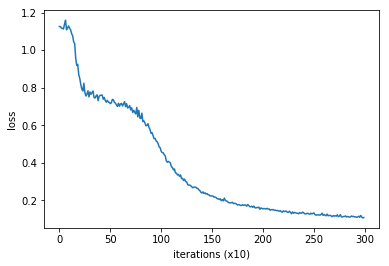

In [62]:
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

In [63]:
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

(-1.0223506996640548,
 1.0886493003357127,
 -0.98867266170702151,
 1.0573273382929806)

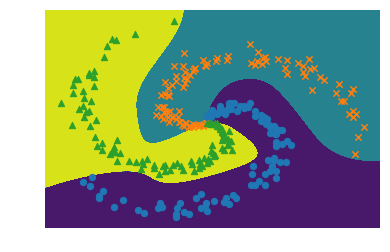

In [64]:
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()